In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%precision %.10g
sns.set_style("dark")

# Get Data

In [3]:
city_mrg_df = pd.read_csv('Datasets/Discoveries/City_Merged_Population_Data.csv')

In [4]:
city_mrg_df = city_mrg_df.loc[:, ~city_mrg_df.columns.str.contains('^Unnamed')]

In [5]:
city_mrg_df.head(3)

,Region,State,POP_2000,POP_2001,POP_2002,POP_2003,POP_2004,POP_2005,POP_2010,POP_2011,POP_2012,POP_2013,POP_2014,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,Mean_Pop
0,Alabama,Alabama,4452339,4467461,4480139,4501862,4525375,4557808,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532,4.745656e+06
1,Abbeville city,Alabama,2987,2954,2946,2946,2958,2963,2699,2694,2645,2629,2610,2602,2587,2578,2565,2555,2553,2.717750e+03
2,Adamsville city,Alabama,5053,5025,4987,4954,4899,4845,4481,4474,4453,4430,4399,4371,4335,4304,4285,4254,4211,4.544188e+03


In [6]:
state_tallies = city_mrg_df[city_mrg_df['Region'] == city_mrg_df['State']].reset_index(drop=True)

In [7]:
state_tallies.head(5)

,Region,State,POP_2000,POP_2001,POP_2002,POP_2003,POP_2004,POP_2005,POP_2010,POP_2011,POP_2012,POP_2013,POP_2014,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,Mean_Pop
0,Alabama,Alabama,4452339,4467461,4480139,4501862,4525375,4557808,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532,4.745656e+06
1,Alaska,Alaska,627500,632249,640699,648510,657755,663661,713982,722349,730810,737626,737075,738430,742575,740983,736624,733603,731158,7.067556e+05
2,Arizona,Arizona,5165993,5295929,5438159,5577784,5739879,5939292,6407342,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401,6.468678e+06
3,Arkansas,Arkansas,2678511,2691581,2706606,2726166,2750000,2779154,2921998,2941038,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3030522,2.902357e+06
4,California,California,34002756,34526660,34988088,35456602,35842038,36132147,37319550,37636311,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39368078,3.764505e+07


### Graph 1: Total Population over the years.

In [8]:
year_pop_totals = state_tallies.sum(axis=0).drop(index=['Region', 'State', 'Mean_Pop'])

In [9]:
year_pop_totals

POP_2000    282193477
POP_2001    285107923
POP_2002    287984799
POP_2003    290850005
POP_2004    293656842
POP_2005    296410404
POP_2010    309327143
POP_2011    311583481
POP_2012    313877662
POP_2013    316059947
POP_2014    318386329
POP_2015    320738994
POP_2016    323071755
POP_2017    325122128
POP_2018    326838199
POP_2019    328329953
POP_2020    329484123
dtype: object

In [10]:
year_pop_totals =year_pop_totals.reset_index()
year_pop_totals.columns = ['year', 'population']

In [11]:
year_pop_totals

,year,population
0,POP_2000,282193477
1,POP_2001,285107923
2,POP_2002,287984799
3,POP_2003,290850005
4,POP_2004,293656842
5,POP_2005,296410404
6,POP_2010,309327143
7,POP_2011,311583481
8,POP_2012,313877662
9,POP_2013,316059947


In [12]:
for i in range (len(year_pop_totals)):
    if(i>=1):
        year_pop_totals.loc[i,'change_YoY'] = (((year_pop_totals.loc[i,'population'] / year_pop_totals.loc[i-1,'population'])-1)*100).round(2)
    else: 
        year_pop_totals.loc[i,'change_YoY'] = 0
    year_pop_totals.loc[i,'comp_2000'] = (((year_pop_totals.loc[i,'population'] / year_pop_totals.loc[0,'population'])-1)*100).round(2)

In [13]:
year_pop_totals

,year,population,change_YoY,comp_2000
0,POP_2000,282193477,0.00,0.00
1,POP_2001,285107923,1.03,1.03
2,POP_2002,287984799,1.01,2.05
3,POP_2003,290850005,0.99,3.07
4,POP_2004,293656842,0.97,4.06
5,POP_2005,296410404,0.94,5.04
6,POP_2010,309327143,4.36,9.62
7,POP_2011,311583481,0.73,10.41
8,POP_2012,313877662,0.74,11.23
9,POP_2013,316059947,0.70,12.00


There were 3 years that broke 1% population increase: 2000, 2001, and 2010. 
The overall growth over the last 20 years of data has been 16.76%

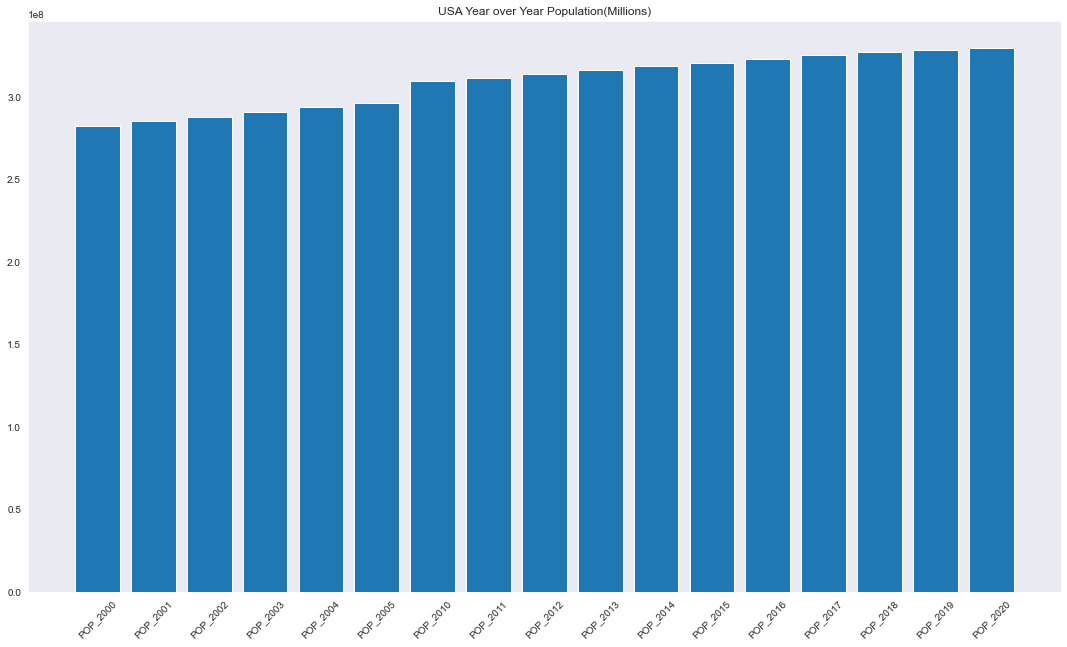

In [14]:

#Create
fig, ax = plt.subplots()
#Data
x1 = year_pop_totals['year']
y1 =year_pop_totals['population'] 
#Appearance

ax.bar(x1, y1,label='Populations')
ax.set_title("USA Year over Year Population(Millions)")  # Add a title to the axes.
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=45)
plt.show()

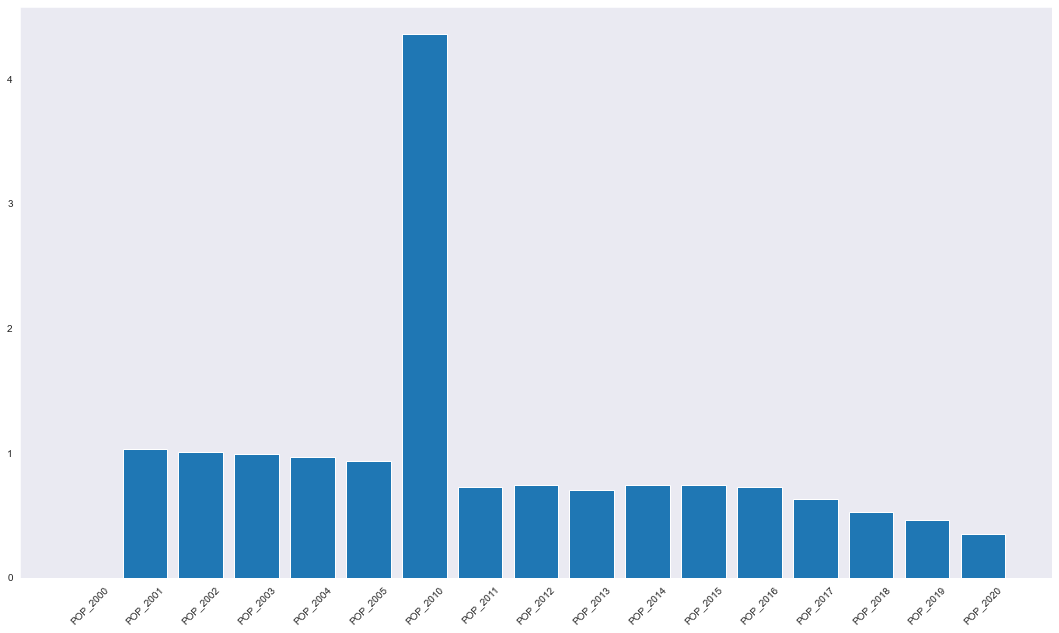

In [15]:
fig, ax = plt.subplots()
x1 = year_pop_totals['year']
y1 =year_pop_totals['change_YoY'] 

p1 = ax.bar(x1, y1,label='Population change')

fig.set_size_inches(18.5, 10.5)

plt.xticks(rotation=45)
plt.show()

From these graphs, and the data above, I see that we are experiencing a slowdown in population growth at a high level.

### City-Level Growth

In [16]:
city_tallies = city_mrg_df[city_mrg_df['Region'] != city_mrg_df['State']].reset_index(drop=True)


In [17]:
city_tallies

,Region,State,POP_2000,POP_2001,POP_2002,POP_2003,POP_2004,POP_2005,POP_2010,POP_2011,POP_2012,POP_2013,POP_2014,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,Mean_Pop
0,Abbeville city,Alabama,2987,2954,2946,2946,2958,2963,2699,2694,2645,2629,2610,2602,2587,2578,2565,2555,2553,2717.7500
1,Adamsville city,Alabama,5053,5025,4987,4954,4899,4845,4481,4474,4453,4430,4399,4371,4335,4304,4285,4254,4211,4544.1875
2,Addison town,Alabama,721,714,713,712,710,713,751,750,745,744,742,734,734,728,725,723,717,728.4375
3,Akron town,Alabama,522,522,518,519,511,514,355,347,347,344,338,338,335,332,332,328,327,394.1875
4,Alabaster city,Alabama,24029,24535,25059,25738,26815,27517,31192,31361,31673,31969,32177,32767,33040,33291,33442,33522,33701,30487.4375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97488,Balance of Uinta County,Wyoming,4707,4721,4802,4814,4837,4893,4824,4806,4845,4852,4831,4834,4843,4794,4804,4810,4836,4821.6250
97489,Washakie County,Wyoming,8264,8067,7940,7926,7890,7933,8531,8451,8410,8417,8277,8282,8180,8013,7886,7824,7760,8111.6875
97490,Balance of Washakie County,Wyoming,2728,2666,2632,2643,2625,2651,2782,2756,2735,2736,2691,2690,2654,2599,2556,2537,2516,2654.3125
97491,Weston County,Wyoming,6643,6522,6619,6671,6677,6671,7198,7142,7075,7132,7134,7202,7228,6962,6895,6880,6743,6921.9375


In [18]:
city_tallies['growth'] = city_tallies['POP_2020'] - city_tallies['POP_2000']

In [19]:
city_tallies.sort_values('growth')

,Region,State,POP_2000,POP_2001,POP_2002,POP_2003,POP_2004,POP_2005,POP_2010,POP_2011,...,POP_2013,POP_2014,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,Mean_Pop,growth
5185,Chicago city,Illinois,2896069,2896374,2887089,2875909,2861037,2842518,0,0,...,0,0,0,0,0,0,0,0,8.976829e+05,-2896069
7233,Chicago city (pt.),Illinois,2896051,2896290,2886940,2875678,2860727,2842150,0,0,...,0,0,0,0,0,0,0,0,8.976116e+05,-2896051
5187,Chicago city,Illinois,2896051,2896290,2886940,2875678,2860727,2842150,0,0,...,0,0,0,0,0,0,0,0,8.976116e+05,-2896051
56491,New York city (pt.),New York,2466784,2474347,2479338,2483164,2497859,2486235,469607,471014,...,471783,471899,472301,474160,475819,476531,476141,475327,1.101633e+06,-1991457
91447,Houston city (pt.),Texas,1927346,1944244,1965908,1971699,1971039,1975143,5052,5121,...,5273,5368,5474,5566,5632,5716,5769,5835,6.180018e+05,-1921511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56503,New York city (pt.),New York,445525,450600,455712,460333,462695,464573,2509954,2540918,...,2587759,2601527,2608797,2608146,2594357,2580088,2562329,2538934,1.912204e+06,2093409
91443,Houston city (pt.),Texas,33666,34717,36331,37862,39381,40688,2055132,2080471,...,2152093,2193487,2237381,2259411,2266129,2267249,2268155,2268194,1.522003e+06,2234528
91449,Houston city (pt.),Texas,470,519,572,631,699,751,2055132,2080471,...,2152093,2193487,2237381,2259411,2266129,2267249,2268155,2268194,1.510390e+06,2267724
5188,Chicago city,Illinois,18,84,149,231,310,368,2697480,2708067,...,2725575,2726800,2724006,2716297,2710456,2700968,2691497,2677643,1.862436e+06,2677625


Some of the city-level data has immediately proven itself to be untrustworthy. I'll continue to pair states against each other.

### State-level Growth part 2

In [20]:
state_tallies.head(3)

,Region,State,POP_2000,POP_2001,POP_2002,POP_2003,POP_2004,POP_2005,POP_2010,POP_2011,POP_2012,POP_2013,POP_2014,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,Mean_Pop
0,Alabama,Alabama,4452339,4467461,4480139,4501862,4525375,4557808,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532,4.745656e+06
1,Alaska,Alaska,627500,632249,640699,648510,657755,663661,713982,722349,730810,737626,737075,738430,742575,740983,736624,733603,731158,7.067556e+05
2,Arizona,Arizona,5165993,5295929,5438159,5577784,5739879,5939292,6407342,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401,6.468678e+06


In [21]:
st_2010 = state_tallies[['State', 'POP_2010']]
st_2020 = state_tallies[['State', 'POP_2020']]

In [22]:
state_tallies['growth'] = state_tallies['POP_2020'] - state_tallies['POP_2010']

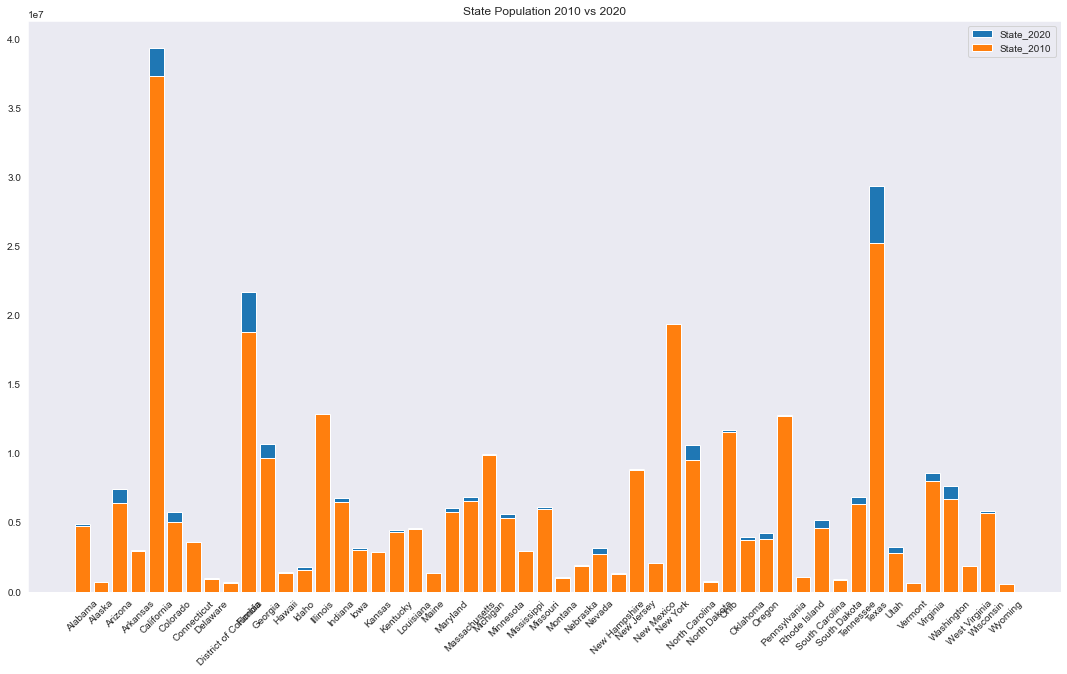

In [23]:

#Create
fig, ax = plt.subplots()

x1 = st_2020['State']
y1 = st_2020['POP_2020'] 
#Data
x2 = st_2010['State']
y2 = st_2010['POP_2010'] 
#Appearance
ax.bar(x1, y1,label='State_2020')
ax.bar(x2, y2,label='State_2010')
ax.set_title("State Population 2010 vs 2020")  # Add a title to the axes.
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [24]:
state_tallies['growth'] = state_tallies['POP_2020'] - state_tallies['POP_2010']
state_tallies['growth_pct'] = state_tallies['POP_2020'] / state_tallies['POP_2010']

In [25]:
biggest_growth_states = state_tallies[['State','POP_2010', 'POP_2020', 'growth', 'growth_pct']].sort_values(by='growth_pct',ascending=False)

In [26]:
biggest_growth_states.head(10)

,State,POP_2010,POP_2020,growth,growth_pct
8,District of Columbia,605282,712816,107534,1.177659
44,Utah,2775413,3249879,474466,1.170953
43,Texas,25241897,29360759,4118862,1.163176
12,Idaho,1570819,1826913,256094,1.163032
28,Nevada,2702483,3138259,435776,1.161250
2,Arizona,6407342,7421401,1014059,1.158265
9,Florida,18846143,21733312,2887169,1.153197
5,Colorado,5047539,5807719,760180,1.150604
47,Washington,6743009,7693612,950603,1.140976
34,North Dakota,674752,765309,90557,1.134208


In [27]:
state_tallies[['State', 'growth', 'growth_pct']].corr()

,growth,growth_pct
growth,1.000000,0.527241
growth_pct,0.527241,1.000000


The states with the largest percent growth came from a very wide spread of populations, and geographic locations

In [28]:
biggest_growth_states.tail(10)

,State,POP_2010,POP_2020,growth,growth_pct
30,New Jersey,8799451,8882371,82920,1.009423
22,Michigan,9877597,9966555,88958,1.009006
38,Pennsylvania,12711406,12783254,71848,1.005652
39,Rhode Island,1053994,1057125,3131,1.002971
24,Mississippi,2970615,2966786,-3829,0.998711
32,New York,19399956,19336776,-63180,0.996743
45,Vermont,625886,623347,-2539,0.995943
6,Connecticut,3579173,3557006,-22167,0.993807
13,Illinois,12840545,12587530,-253015,0.980296
48,West Virginia,1854265,1784787,-69478,0.962531


Likewise, some of out smallest growth percents (or population declines) were from a wide spread of locations.

In [29]:
mean_growth = biggest_growth_states['growth_pct'].mean()

In [30]:
biggest_growth_states['growth_dev'] = biggest_growth_states['growth_pct'] - mean_growth

In [31]:
len(biggest_growth_states[biggest_growth_states['growth_dev'] > 0])

20

Twenty of the 51 States saw growth, decline wasn't dramatic (the worst being 4%) but it was still more than half.  

### Finding correlations for growth

In [32]:
weighted_states = pd.read_csv('Final_Data/Full_Weighted_States.csv')

In [33]:

weighted_states['bachelors_to_pop10'] = weighted_states[ 'Bachelor\'s Degree Holders']/ weighted_states['Top_10_Mean_Pop']

In [34]:
weighted_states.head(3)

,StateAbbreviation,State,Region,debt,Mean_Rental_Value,hs_degree,rent_gt_10,rent_gt_50,Top_10_Mean_Pop,Bachelor's Degree Holders,...,max_hsdeg_rank,min_rentgt10_rank,min_rentgt50_rank,max_opportunity_rank,max_bachelors_rank,max_house_income_rank,max_sci_eng_degs_rank,max_buss_degs_rank,tally,bachelors_to_pop10
0,NY,New York,Northeastern,0.625454,4105.638298,0.855546,0.957364,0.293017,2922991.331,10332436,...,0.705166,0.797465,0.000000,0.994964,0.989825,0.944491,0.989825,0.984581,7.244562,3.534884
1,CA,California,California,0.720963,2436.204120,0.812592,0.970595,0.289799,3040980.981,18856968,...,0.279415,0.279415,0.176291,1.000000,1.000000,0.956604,1.000000,1.000000,6.250557,6.200949
2,TX,Texas,Southern,0.553786,1400.476648,0.805066,0.950501,0.226842,2056621.913,11553066,...,0.000000,0.918382,0.925165,0.984581,0.994964,0.873382,0.994964,0.994964,8.379764,5.617496


In [35]:
df_grp = weighted_states.merge(biggest_growth_states, on='State')

In [36]:
df_grp_c = df_grp[['StateAbbreviation', 'State','Region', 'debt', 'Mean_Rental_Value',
       'hs_degree', 'rent_gt_10', 'rent_gt_50', 'Top_10_Mean_Pop',
       'bachelors_to_pop10', 'hi_mean', 'Science and Engineering',
       'Business', 'growth_pct']]

In [37]:
df_grp_c.corr()

,debt,Mean_Rental_Value,hs_degree,rent_gt_10,rent_gt_50,Top_10_Mean_Pop,bachelors_to_pop10,hi_mean,Science and Engineering,Business,growth_pct
debt,1.000000,0.522649,0.263528,0.642903,0.258175,0.238857,-0.049045,0.722306,0.269095,0.178204,0.216831
Mean_Rental_Value,0.522649,1.000000,0.035909,0.416891,0.497988,0.601981,-0.166601,0.639148,0.489074,0.422259,0.066614
hs_degree,0.263528,0.035909,1.000000,-0.212711,-0.499126,-0.385708,-0.192583,0.404293,-0.387806,-0.438882,0.001197
rent_gt_10,0.642903,0.416891,-0.212711,1.000000,0.710290,0.316160,0.192196,0.268843,0.353952,0.355159,-0.005772
rent_gt_50,0.258175,0.497988,-0.499126,0.710290,1.000000,0.471542,0.150170,0.097141,0.445501,0.459042,-0.175914
Top_10_Mean_Pop,0.238857,0.601981,-0.385708,0.316160,0.471542,1.000000,0.019218,0.262289,0.899003,0.897078,0.012099
bachelors_to_pop10,-0.049045,-0.166601,-0.192583,0.192196,0.150170,0.019218,1.000000,-0.190318,0.298864,0.334484,-0.029880
hi_mean,0.722306,0.639148,0.404293,0.268843,0.097141,0.262289,-0.190318,1.000000,0.271499,0.175737,0.054940
Science and Engineering,0.269095,0.489074,-0.387806,0.353952,0.445501,0.899003,0.298864,0.271499,1.000000,0.964601,0.068788
Business,0.178204,0.422259,-0.438882,0.355159,0.459042,0.897078,0.334484,0.175737,0.964601,1.000000,0.099415


There are no particularly strong correlations, of the bunch the top correlations to growth_pct are:
* 21% correlation between growth and debt
* -17% correlation between growth and rent greater than 50% of income

So the larger a city becomes, the more debt increases. At the same time, it looks like with that growth, rent being greater than 50% or even 10% of income does drop, could this be because of an increased likelihood of roommates/ families living together and splitting costs?

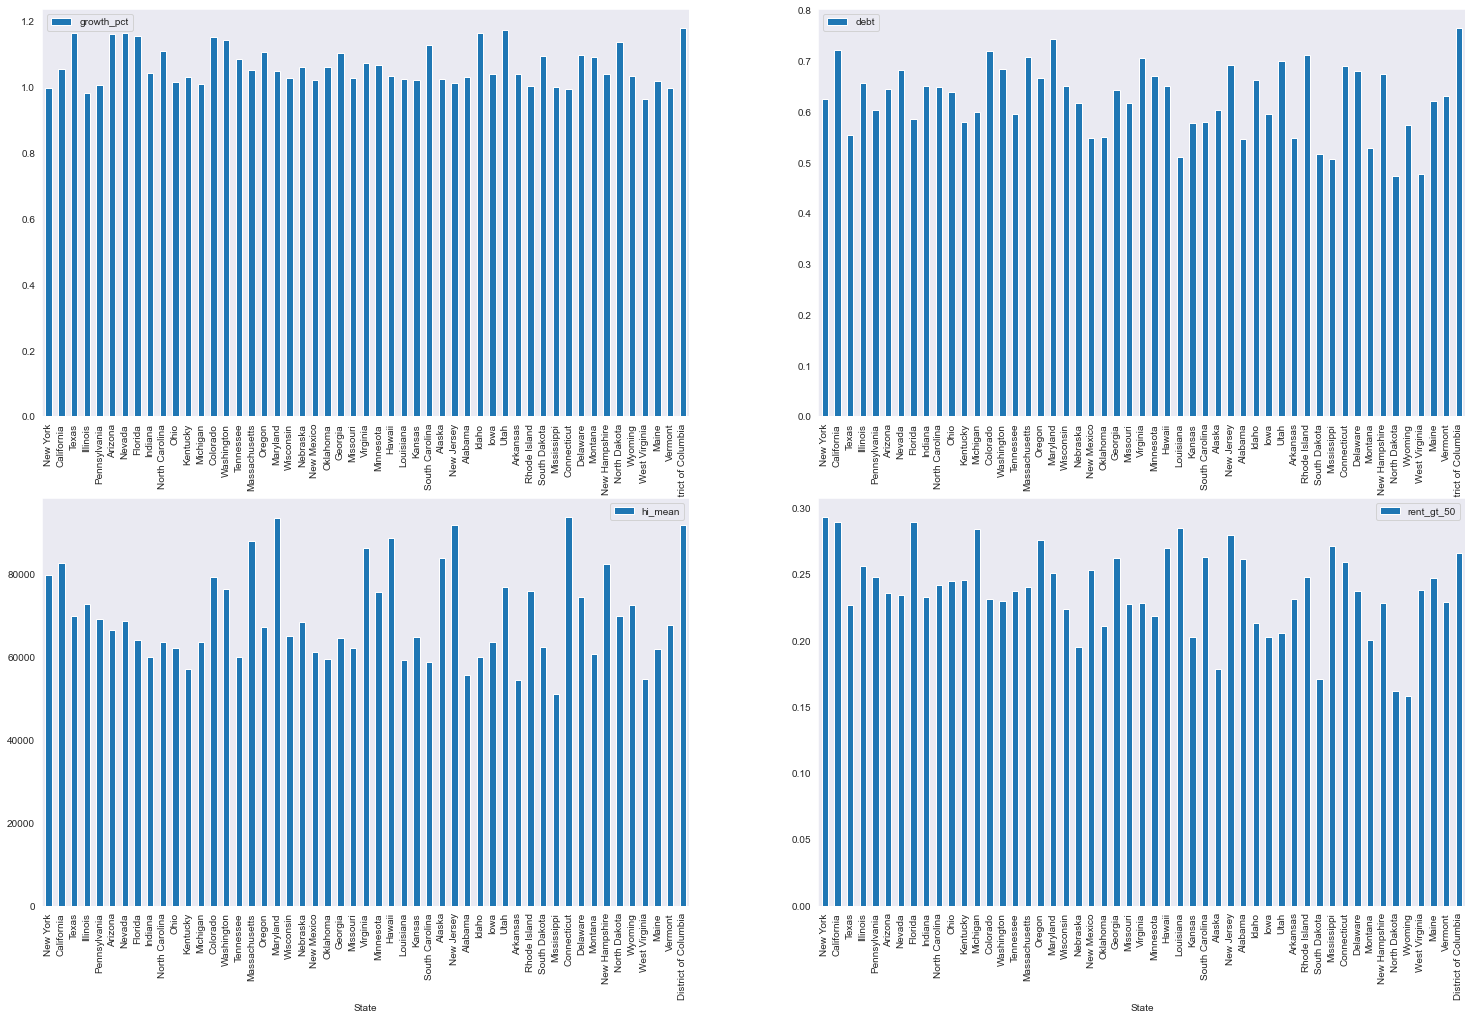

In [38]:
#Create
fig, axes = plt.subplots(nrows=2, ncols=2)

p1 = df_grp[['State','growth_pct']]
p2 = df_grp[['State','debt']]
p3 = df_grp[['State','hi_mean']]
p4 = df_grp[['State','rent_gt_50']]

#Appearance
p1.plot(x='State',kind='bar',label='growth', ax=axes[0,0])
p2.plot(x='State',kind='bar',label='debt',ax=axes[0,1])
p3.plot(x='State',kind='bar',label='income',ax=axes[1,0])
p4.plot(x='State',kind='bar',label='rent > 50%', ax=axes[1,1])
fig.set_size_inches(25.5, 16.5)
plt.show()

In [39]:
df_grp.head(10)

,StateAbbreviation,State,Region,debt,Mean_Rental_Value,hs_degree,rent_gt_10,rent_gt_50,Top_10_Mean_Pop,Bachelor's Degree Holders,...,max_house_income_rank,max_sci_eng_degs_rank,max_buss_degs_rank,tally,bachelors_to_pop10,POP_2010,POP_2020,growth,growth_pct,growth_dev
0,NY,New York,Northeastern,0.625454,4105.638298,0.855546,0.957364,0.293017,2.922991e+06,10332436,...,0.944491,0.989825,0.984581,7.244562,3.534884,19399956,19336776,-63180,0.996743,-0.065590
1,CA,California,California,0.720963,2436.204120,0.812592,0.970595,0.289799,3.040981e+06,18856968,...,0.956604,1.000000,1.000000,6.250557,6.200949,37319550,39368078,2048528,1.054892,-0.007441
2,TX,Texas,Southern,0.553786,1400.476648,0.805066,0.950501,0.226842,2.056622e+06,11553066,...,0.873382,0.994964,0.994964,8.379764,5.617496,25241897,29360759,4118862,1.163176,0.100843
3,IL,Illinois,Midwestern,0.655639,1324.276860,0.866427,0.956212,0.256194,2.087270e+06,6217944,...,0.896876,0.979226,0.979226,8.626310,2.978983,12840545,12587530,-253015,0.980296,-0.082037
4,PA,Pennsylvania,Northeastern,0.603620,1293.475610,0.888476,0.951295,0.248054,8.504375e+05,5834804,...,0.865043,0.973757,0.973757,8.969821,6.860944,12711406,12783254,71848,1.005652,-0.056681
5,AZ,Arizona,Western,0.644890,1261.286885,0.850450,0.961349,0.236027,8.886997e+05,2984316,...,0.818672,0.904249,0.904249,8.345903,3.358070,6407342,7421401,1014059,1.158265,0.095932
6,NV,Nevada,Western,0.681664,1353.943182,0.844936,0.963741,0.233991,4.759029e+05,1097838,...,0.856420,0.748873,0.761919,7.502030,2.306853,2702483,3138259,435776,1.161250,0.098917
7,FL,Florida,Southern,0.585855,1734.543353,0.864691,0.972466,0.289089,1.285841e+06,9507274,...,0.774328,0.984581,0.989825,7.357410,7.393820,18846143,21733312,2887169,1.153197,0.090864
8,IN,Indiana,Midwestern,0.649533,1029.879032,0.863134,0.952637,0.232558,4.612856e+05,2425652,...,0.609868,0.847495,0.873382,8.219573,5.258460,6490555,6754953,264398,1.040736,-0.021597
9,NC,North Carolina,Southern,0.647817,1185.566929,0.853606,0.960852,0.241547,5.183520e+05,4642370,...,0.735122,0.944491,0.950619,8.347259,8.956019,9574586,10600823,1026237,1.107183,0.044851


### create targeted weights

I'm going to take the strongest indicators of a well-suited location for affordability, education and decent income/opportuniuties and turn those into scored columns to use later


In [40]:
df_grp.columns

Index(['StateAbbreviation', 'State', 'Region', 'debt', 'Mean_Rental_Value',
       'hs_degree', 'rent_gt_10', 'rent_gt_50', 'Top_10_Mean_Pop',
       'Bachelor's Degree Holders', 'hi_mean', 'Science and Engineering',
       'Business', 'min_debt_rank', 'min_rent_rank', 'max_hsdeg_rank',
       'min_rentgt10_rank', 'min_rentgt50_rank', 'max_opportunity_rank',
       'max_bachelors_rank', 'max_house_income_rank', 'max_sci_eng_degs_rank',
       'max_buss_degs_rank', 'tally', 'bachelors_to_pop10', 'POP_2010',
       'POP_2020', 'growth', 'growth_pct', 'growth_dev'],
      dtype='object')

In [41]:
df_affordability = df_grp [['State','Region','Mean_Rental_Value', 'min_debt_rank', 'min_rent_rank', 
       'min_rentgt10_rank', 'min_rentgt50_rank', 
       'max_bachelors_rank', 'max_house_income_rank' ]]
df_affordability['rent_to_min'] = 15080 /( df_affordability['Mean_Rental_Value']*12)#Minimum wage annua

C:\Users\joshf\AppData\Local\Temp/ipykernel_26780/1683807497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_affordability['rent_to_min'] = 15080 /( df_affordability['Mean_Rental_Value']*12)#Minimum wage annua


In [42]:
df_affordability.head(3)

,State,Region,Mean_Rental_Value,min_debt_rank,min_rent_rank,min_rentgt10_rank,min_rentgt50_rank,max_bachelors_rank,max_house_income_rank,rent_to_min
0,New York,Northeastern,4105.638298,0.838246,0.000000,0.797465,0.000000,0.989825,0.944491,0.306083
1,California,California,2436.204120,0.279415,0.279415,0.279415,0.176291,1.000000,0.956604,0.515830
2,Texas,Southern,1400.476648,0.944491,0.748873,0.918382,0.925165,0.994964,0.873382,0.897314


In [43]:
df_education = df_grp[['State',  'max_hsdeg_rank',
       'max_opportunity_rank', 'max_bachelors_rank',  'max_sci_eng_degs_rank',
       'max_buss_degs_rank', 'bachelors_to_pop10']]

In [44]:
df_earnings = df_grp[['State','min_rentgt10_rank', 'min_rentgt50_rank', 'max_opportunity_rank',
       'max_bachelors_rank', 'max_house_income_rank']]

In [45]:
df_affordability['score'] = df_affordability[['rent_to_min','min_debt_rank', 'min_rent_rank', 
       'min_rentgt10_rank', 'min_rentgt50_rank', 
       'max_bachelors_rank', 'max_house_income_rank']].sum(axis=1)
df_education['score'] = df_education[[ 'max_hsdeg_rank',
       'max_opportunity_rank', 'max_bachelors_rank',  'max_sci_eng_degs_rank',
       'max_buss_degs_rank', 'bachelors_to_pop10']].sum(axis=1)
df_earnings['score'] = df_earnings[['min_rentgt10_rank', 'min_rentgt50_rank', 'max_opportunity_rank',
       'max_bachelors_rank', 'max_house_income_rank']].sum(axis=1)

C:\Users\joshf\AppData\Local\Temp/ipykernel_26780/2238560467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_affordability['score'] = df_affordability[['rent_to_min','min_debt_rank', 'min_rent_rank',
C:\Users\joshf\AppData\Local\Temp/ipykernel_26780/2238560467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_education['score'] = df_education[[ 'max_hsdeg_rank',
C:\Users\joshf\AppData\Local\Temp/ipykernel_26780/2238560467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [46]:
df_affordability.head(3)

,State,Region,Mean_Rental_Value,min_debt_rank,min_rent_rank,min_rentgt10_rank,min_rentgt50_rank,max_bachelors_rank,max_house_income_rank,rent_to_min,score
0,New York,Northeastern,4105.638298,0.838246,0.000000,0.797465,0.000000,0.989825,0.944491,0.306083,3.876110
1,California,California,2436.204120,0.279415,0.279415,0.279415,0.176291,1.000000,0.956604,0.515830,3.486971
2,Texas,Southern,1400.476648,0.944491,0.748873,0.918382,0.925165,0.994964,0.873382,0.897314,6.302570


In [47]:
df_education.head(3)

,State,max_hsdeg_rank,max_opportunity_rank,max_bachelors_rank,max_sci_eng_degs_rank,max_buss_degs_rank,bachelors_to_pop10,score
0,New York,0.705166,0.994964,0.989825,0.989825,0.984581,3.534884,8.199245
1,California,0.279415,1.000000,1.000000,1.000000,1.000000,6.200949,10.480364
2,Texas,0.000000,0.984581,0.994964,0.994964,0.994964,5.617496,9.586968


In [48]:
df_earnings.head(3)

,State,min_rentgt10_rank,min_rentgt50_rank,max_opportunity_rank,max_bachelors_rank,max_house_income_rank,score
0,New York,0.797465,0.000000,0.994964,0.989825,0.944491,3.726745
1,California,0.279415,0.176291,1.000000,1.000000,0.956604,3.412311
2,Texas,0.918382,0.925165,0.984581,0.994964,0.873382,4.696474


In [49]:
df = df_affordability[['State','Region']]

In [50]:
df['affordability'] = df_affordability['score'].rank()

C:\Users\joshf\AppData\Local\Temp/ipykernel_26780/338472364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['affordability'] = df_affordability['score'].rank()


In [51]:
df['education'] = df_education['score'].rank()

C:\Users\joshf\AppData\Local\Temp/ipykernel_26780/1464825276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df_education['score'].rank()


In [52]:
df['earnings'] = df_earnings['score'].rank()

C:\Users\joshf\AppData\Local\Temp/ipykernel_26780/636097746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earnings'] = df_earnings['score'].rank()


In [53]:
df['summed'] = df[['affordability', 'education', 'earnings']].sum(axis=1)

C:\Users\joshf\AppData\Local\Temp/ipykernel_26780/2650415606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summed'] = df[['affordability', 'education', 'earnings']].sum(axis=1)


In [54]:
ranked_states = df.sort_values('summed', ascending = False).reset_index(drop=True)

I aimed for evenly valued groupings by ranking each column, removing any outliers from the equation.

In [55]:
ranked_states.head(10)

,State,Region,affordability,education,earnings,summed
0,Pennsylvania,Northeastern,38.0,44.0,50.0,132.0
1,Iowa,Midwestern,51.0,39.0,36.0,126.0
2,Texas,Southern,41.0,31.0,51.0,123.0
3,Minnesota,Midwestern,28.0,46.0,48.0,122.0
4,Missouri,Midwestern,49.0,35.0,38.0,122.0
5,Ohio,Midwestern,46.0,34.0,42.0,122.0
6,Kansas,Midwestern,50.0,28.0,40.0,118.0
7,North Carolina,Southern,32.0,50.0,34.0,116.0
8,Wisconsin,Midwestern,40.0,30.0,45.0,115.0
9,Virginia,Southern,18.0,51.0,43.0,112.0


In [56]:
ranked_regions = ranked_states.groupby('Region').mean()

In [57]:
ranked_states.to_csv('Final_Data/Grouped_State_Ranks.csv')

In [58]:
ranked_regions.round(1)

,affordability,education,earnings,summed
Region,,,,
California,1.0,38.0,13.0,52.0
Midwestern,41.1,26.6,35.1,102.8
Northeastern,13.6,24.4,25.1,63.1
Southern,26.3,33.0,21.3,80.6
Special,2.0,1.0,29.0,32.0
Western,23.9,18.3,24.7,66.9
